## **Homework 4 - Denoising a colour image**
#### **It is necessary to modify the autoencoder denoising program to manage color images. The dataset to use is CIFAR10 which can be loaded using the following instructions:**

- from tensorflow.keras.datasets import cifar10

- (x_train, Yt),(x_test,Yv) = cifar10.load_data()

- Use noise_factor=0.05 :

  x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)

- Fit the NN with epochs>100

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [29]:
(x_train, Yt),(x_test,Yv) = cifar10.load_data()
x_train = x_train / 255
x_test = x_test / 255

In [30]:
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

In [31]:
noise_factor = 0.05

x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

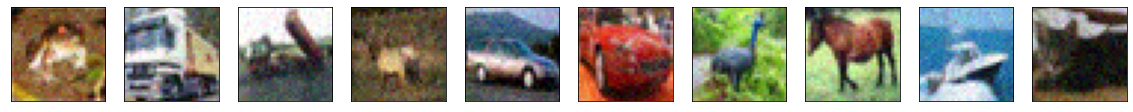

In [32]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
input_img = Input(shape=(32, 32, 3))  
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        9248      
                                                           

In [34]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                )

Epoch 1/200
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5661 - val_loss: 0.5590
Epoch 2/200
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5573 - val_loss: 0.5571
Epoch 3/200
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5556 - val_loss: 0.5560
Epoch 4/200
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5545 - val_loss: 0.5547
Epoch 5/200
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5537 - val_loss: 0.5548
Epoch 6/200
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5531 - val_loss: 0.5536
Epoch 7/200
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5528 - val_loss: 0.5546
Epoch 8/200
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5524 - val_loss: 0.5542
Epoch 9/200
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5522 - val_loss: 0.5531
Epoch 10/200
1563/1563 [==============================] - 14s 9

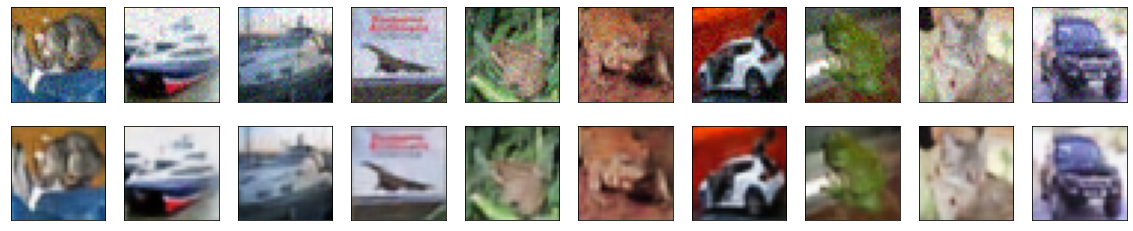

In [38]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()